# Analysis

The goal of this analysis is to understand the distribution of urban and mixed use zoning in San Jose. They are as follows:


1. **Urban Village Commercial (UVC)** — Focused on commercial development in urban villages with pedestrian-oriented form. 
2. **Urban Village (UV)** — Mixed residential + commercial, with a variety of uses and a strong urban form emphasis. 
3. **Mixed Use Commercial (MUC)** — Supports a mix of commercial and residential uses; also can include light industrial if compatible. 
4. **Mixed Use Neighborhood (MUN)** — Targets more residential forms (townhouses, small lots, stacked flats), live/work, small-scale commercial. 
5. **Urban Residential (UR)** — Medium-density residential or mixed use; also allows stand-alone commercial (offices, retail, etc.). 
6. **Transit Residential (TR)** — High-density residential or mixed use near transit; also supports intensive commercial/employment uses like hotels or offices


Shapefiles for this analyis can be found [here](https://data.sanjoseca.gov/organization/maps-data).


In [19]:

#
# Import libraries
# --------------------------------------
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns



# settings
%matplotlib inline
plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None) # set off to see all columns



In [20]:
#
# Load data
# --------------------------------------
# Load the cleaned dataset produced by the ETL pipeline
parcels = gpd.read_parquet("../output/parcels_with_zoning.parquet")

print("Number of parcels:", len(parcels))
parcels.head()


Number of parcels: 224908


,OBJECTID_left,PARCELID,INTID_left,APN,LOTNUM,PARCELTYPE,FEATURECLA,PLANCRT,PLANMOD,LASTUPDATE_left,NOTES_left,COVERED,SHAPE_Leng_left,SHAPE_Area_left,CREATIONDA,geometry,OBJECTID_right,FACILITYID,INTID_right,ZONING,ZONINGABBR,REZONINGFI,PDUSE,PDDENSITY,DEVELOPEDA,APPROVALDA,COLORCODE,LASTUPDATE_right,NOTES_right,SHAPE_Leng_right,SHAPE_Area_right,overlap_area,zoning,zoning_class,zoning_planned
0,4378,1000,1000,09759046,46,Tax,Parcel,T-8284,None,2005-10-25,None,None,149.517344,1163.273287,1900-01-01,"POLYGON ((6148775 1972503.67, 6148789.84 19724...",1396.0,1396,1396.0,A(PD),A(PD),88034,Res,25.6,Yes,None,17,2022-04-22,None,5039.839521,1.155021e+06,1163.273287,Other,Special Purpose,True
1,173262,1000000031,1000000031,30326084,6,Tax,Parcel,TR9494,None,2006-01-12,None,None,188.703136,2037.538177,1900-01-01,"POLYGON ((6135031.65 1943098.55, 6135092.737 1...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,2037.538177,Other,Special Purpose,True
2,69247,1000000032,1000000032,30326083,5,Tax,Parcel,TR9494,None,2006-01-12,None,None,187.780061,2020.818784,1900-01-01,"POLYGON ((6135031.425 1943065.085, 6135092.096...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,2020.818784,Other,Special Purpose,True
3,147109,1000000033,1000000033,30326082,4,Tax,Parcel,TR9494,None,2006-01-12,None,None,187.209294,1994.378436,1900-01-01,"POLYGON ((6135129.912 1943077.395, 6135136.921...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,1994.378436,Other,Special Purpose,True
4,147110,1000000034,1000000034,30326081,3,Tax,Parcel,TR9494,None,2006-01-12,None,None,212.838294,2261.152730,1900-01-01,"POLYGON ((6135219.701 1943048.88, 6135219.367 ...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,2261.152730,Other,Special Purpose,True


In [21]:
# -----------------------------------------------------
# Step 1: Filter to the mixed use zoning types
# -----------------------------------------------------
parcels_target = parcels.query(" zoning_class == 'Mixed Use' ")
print("Parcels in target zones:", len(parcels_target))
parcels_target.head()

Parcels in target zones: 4173


,OBJECTID_left,PARCELID,INTID_left,APN,LOTNUM,PARCELTYPE,FEATURECLA,PLANCRT,PLANMOD,LASTUPDATE_left,NOTES_left,COVERED,SHAPE_Leng_left,SHAPE_Area_left,CREATIONDA,geometry,OBJECTID_right,FACILITYID,INTID_right,ZONING,ZONINGABBR,REZONINGFI,PDUSE,PDDENSITY,DEVELOPEDA,APPROVALDA,COLORCODE,LASTUPDATE_right,NOTES_right,SHAPE_Leng_right,SHAPE_Area_right,overlap_area,zoning,zoning_class,zoning_planned
308,160369,1000000644,1000000644,25958C01,1,GCE,Parcel,T-9665,MGE,2006-03-10,None,None,1277.728161,63832.563251,1900-01-01,"POLYGON ((6156170.59 1949881.6, 6155726.946 19...",6240.0,6240,6240.0,TR,TR,C21-041,None,None,No,None,2,2022-04-22,None,1277.726931,63832.461822,63806.463674,Transit Residential,Mixed Use,False
309,160955,1000000649,1000000649,25951003,3,Tax,Parcel,3-14431,None,2006-02-25,None,None,1318.050229,14835.996702,1900-01-01,"POLYGON ((6156131.281 1949988.966, 6156116.768...",20039.0,20039,20039.0,TR,TR,C21-041,None,41,No,None,2,2022-12-06,None,2025.510124,192138.972584,14860.093961,Transit Residential,Mixed Use,False
683,158079,1000001202,1000001202,25429031,2,Tax,Parcel,3-16693,3-24467,2024-02-12,APNU_20240101,None,500.906075,14115.344144,1900-01-01,"POLYGON ((6167530.399 1964559.232, 6167466.631...",5976.0,5976,5976.0,TR,TR,C23-086,None,None,None,2023/05/16,2,2024-04-11,None,1064.819921,59009.091472,14115.340242,Transit Residential,Mixed Use,False
1013,2339,1000001688,1000001688,41221013,None,Tax,Parcel,T-3756,None,2006-04-03,Distance only.,None,254.996519,509.127245,1900-01-01,"POLYGON ((6145435.829 1926433.08, 6145437.15 1...",31155.0,28843,28843.0,UR,UR,C22-121,None,0,None,2023/06/13,6,2024-04-10,ORD30922,254.996519,509.115978,509.115978,Urban Residential,Mixed Use,False
1903,202959,1000003060,1000003060,47224111,None,Tax,Parcel,T-9621,None,2006-05-05,None,None,437.231119,11680.913709,1900-01-01,"POLYGON ((6161624.82 1945490.22, 6161647.59 19...",11873.0,11873,11873.0,UR,UR,C22-065,None,0,None,2022/08/30,6,2024-04-10,None,1174.776437,58009.454083,11680.910092,Urban Residential,Mixed Use,False


In [22]:
# -----------------------------------------------------
# Step 2: Calculate number of parcels in each zone
# -----------------------------------------------------
parcel_counts = parcels_target.groupby("ZONING").size().reset_index(name="parcel_count")
print("\nParcel Counts by Zoning Class:")
print(parcel_counts)


Parcel Counts by Zoning Class:
    ZONING  parcel_count
0      MUC           495
1      MUN          1662
2  MUN(PD)             1
3       TR           192
4       UR          1398
5   UR(PD)             1
6       UV           314
7      UVC           110


<Axes: >

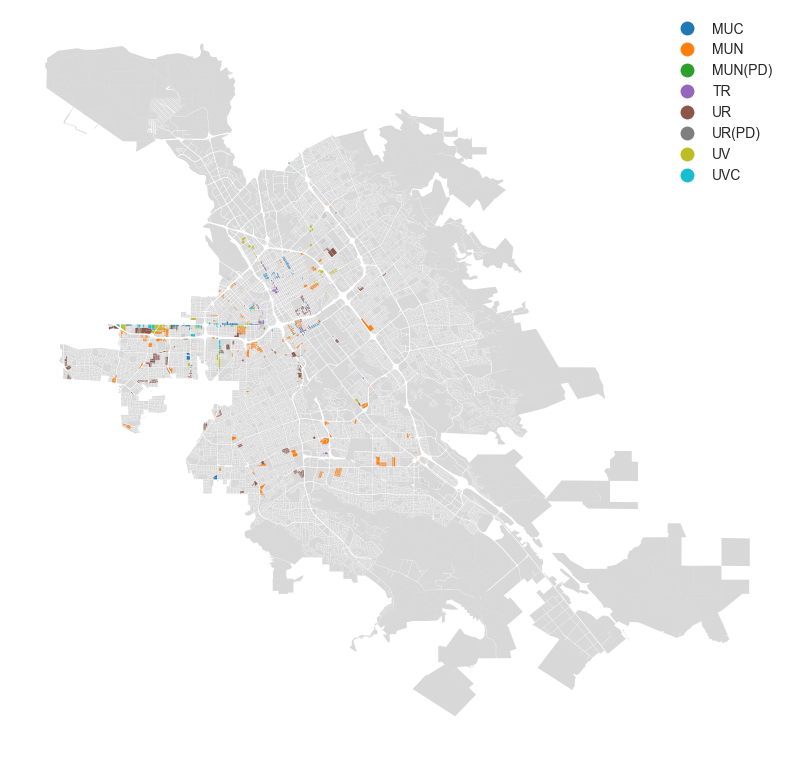

In [23]:
#
# Mixed use zoning in San Jose
# --------------------------------------
fig, ax  = plt.subplots(figsize=(10,12))
ax.axis('off')
parcels.plot(ax = ax, color = 'grey', alpha = 0.3, legend = True)
parcels_target.plot(ax = ax, column = 'ZONING', legend = True)

<positron-console-cell-24>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



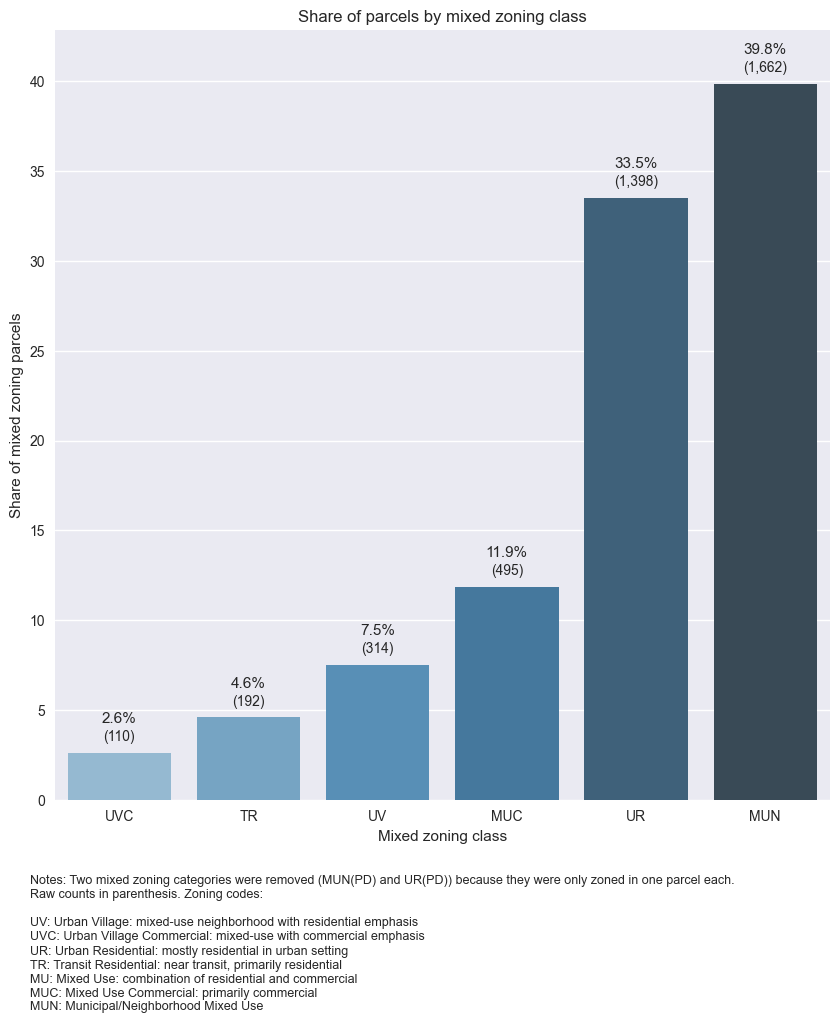

In [24]:
#
# Count unique parcels per zoning district in one step
# --------------------------------------
count = (
    parcels[parcels["zoning_class"] == 'Mixed Use']
    .groupby("ZONING")["PARCELID"]
    .nunique()
)

# Reset index and rename column
count_df = count.reset_index().rename(columns={'PARCELID': 'unique_parcels'})

# Sort by count
count_df = count_df.sort_values(by='unique_parcels', ascending=True)

# Remove small count cases
count_df = count_df[~count_df["ZONING"].isin(["MUN(PD)", "UR(PD)"])]

# ---- NEW: compute shares ----
total = count_df["unique_parcels"].sum()
count_df["share"] = count_df["unique_parcels"] / total * 100

# Create barplot
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=count_df, x='ZONING', y='share', palette='Blues_d', ax=ax)

# extend the y-axis just a bit
max_val = count_df["share"].max()
ax.set_ylim(0, max_val + 3)  

# Add percent labels (slightly above bar)
for i, p in enumerate(ax.patches):
    bar_height = p.get_height()
    percent_val = count_df.iloc[i]["share"]   # percent from df
    
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=bar_height + 1.5,           # constant offset above bar
        s=f"{percent_val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=11
    )

# Add count labels (a constant distance above percent)
for i, p in enumerate(ax.patches):
    bar_height = p.get_height()
    count_val = count_df.iloc[i]["unique_parcels"]  # count from df
    
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=bar_height + 0.5,           # slightly higher offset
        s=f"({count_val:,})",
        ha='center',
        va='bottom',
        fontsize=10
    )


# Labels and title
plt.xlabel('Mixed zoning class')
plt.ylabel('Share of mixed zoning parcels')
plt.title('Share of parcels by mixed zoning class')

# Note at bottom left
zoning_descriptions = {
    "UV": "Urban Village: mixed-use neighborhood with residential emphasis",
    "UVC": "Urban Village Commercial: mixed-use with commercial emphasis",
    "UR": "Urban Residential: mostly residential in urban setting",
    "TR": "Transit Residential: near transit, primarily residential",
    "MU": "Mixed Use: combination of residential and commercial",
    "MUC": "Mixed Use Commercial: primarily commercial",
    "MUN": "Municipal/Neighborhood Mixed Use",
    # Add other zoning codes as needed
}
combined_notes = (
    "Notes: Two mixed zoning categories were removed (MUN(PD) and UR(PD)) "
    "because they were only zoned in one parcel each. \nRaw counts in parenthesis. Zoning codes:\n\n"
     + "\n".join([f"{k}: {v}" for k, v in zoning_descriptions.items()])
)

fig.text(
    0.1, -0.1,          # x, y coordinates
    combined_notes,
    ha="left",
    fontsize=9
)

plt.savefig("../output/figures/mixed_zoning.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [26]:
# -----------------------------------------------------
# Step 3: Convert SHAPE_Area from sq ft to acres
# PDF tells us the SHAPE_Area is in square feet
# -----------------------------------------------------
SQFT_PER_ACRE = 43560

parcels_target["acres"] = parcels_target["SHAPE_Area_left"] / SQFT_PER_ACRE

acreage_summary = parcels_target.groupby("zoning")["acres"].sum().reset_index()
acreage_summary["acres"] = acreage_summary["acres"].round(2)

print("\nAcreage by Zoning Class:")
print(acreage_summary)

/opt/anaconda3/envs/housing_project/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)



Acreage by Zoning Class:
                             zoning   acres
0              Mixed Use Commercial  138.29
1  Municipal/Neighborhood Mixed Use  602.22
2                             Other    1.08
3               Transit Residential   57.68
4                 Urban Residential  510.37
5                     Urban Village  200.56
6          Urban Village Commercial   85.10


In [ ]:

# -----------------------------------------------------
# Step 4: Bring in DU/acre lookup table (from San Jose code)
# -----------------------------------------------------

du_per_acre = {
    "Urban Village": 250,         # <— example, update to real value
    "Mixed Use Commercial": 50,  # <— example
    "Urban Residential": 95,     # <— example
    "Transit Residential": 250   # <— example
}

acreage_summary["du_per_acre"] = acreage_summary["zoning"].map(du_per_acre)
acreage_summary["max_du_capacity"] = acreage_summary["acres"] * acreage_summary["du_per_acre"]
acreage_summary["max_du_capacity"] = acreage_summary["max_du_capacity"].round(0)

print("\nMax Dwelling Unit Capacity by Zone:")
print(acreage_summary[["zoning", "acres", "du_per_acre", "max_du_capacity"]])




Max Dwelling Unit Capacity by Zone:
                             zoning   acres  du_per_acre  max_du_capacity
0              Mixed Use Commercial  138.29         50.0           6914.0
1  Municipal/Neighborhood Mixed Use  602.22          NaN              NaN
2                             Other    1.08          NaN              NaN
3               Transit Residential   57.68        250.0          14420.0
4                 Urban Residential  510.37         95.0          48485.0
5                     Urban Village  200.56        250.0          50140.0
6          Urban Village Commercial   85.10          NaN              NaN


In [ ]:
# -----------------------------------------------------
# Step 5: Compare Urban Village vs Urban Residential total capacity
# -----------------------------------------------------

uv_capacity = acreage_summary.loc[acreage_summary["zoning"] == "Urban Village", "max_du_capacity"].values[0]
ur_capacity = acreage_summary.loc[acreage_summary["zoning"] == "Urban Residential", "max_du_capacity"].values[0]

print("\nComparison of DU Capacity:")
print(f"Urban Village DU Capacity: {uv_capacity:,.0f}")
print(f"Urban Residential DU Capacity: {ur_capacity:,.0f}")

if uv_capacity > ur_capacity:
    print("→ Urban Village has the higher maximum dwelling unit potential.")
else:
    print("→ Urban Residential has the higher maximum dwelling unit potential.")



Comparison of DU Capacity:
Urban Village DU Capacity: 50,140
Urban Residential DU Capacity: 48,485
→ Urban Village has the higher maximum dwelling unit potential.


<positron-console-cell-66>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



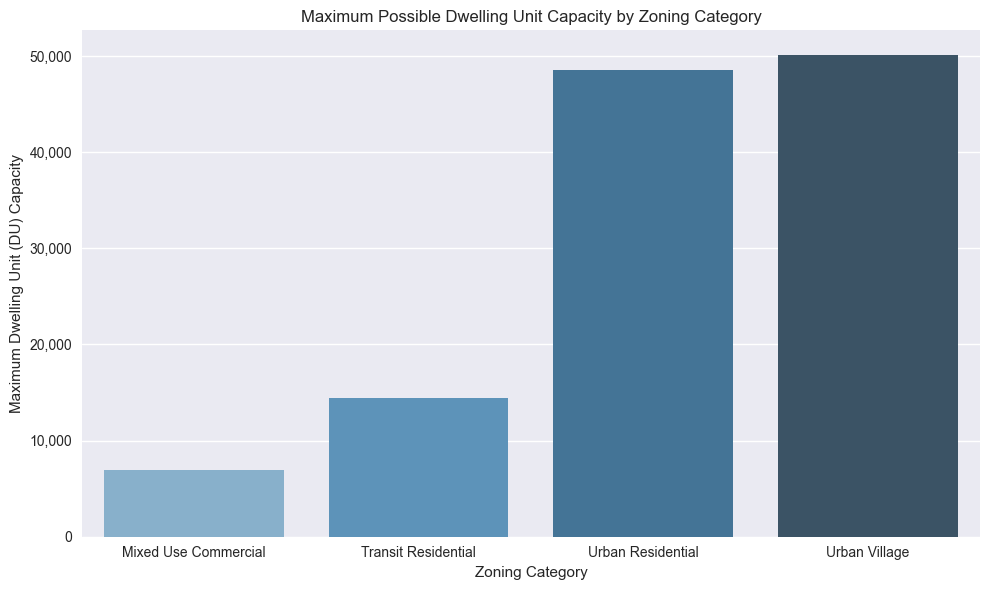

In [66]:

# -----------------------------------------------------
# Step 6: Bar chart of Dwelling unit capacity
# -----------------------------------------------------
# remove NA values before plotting
acreage_summary_plot = acreage_summary.dropna(subset=["max_du_capacity"])

plt.figure(figsize=(10,6))
sns.barplot(
    data=acreage_summary_plot,
    x="zoning",
    y="max_du_capacity",
    palette="Blues_d"
)

# format y-axis with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# title and labels
plt.title("Maximum Possible Dwelling Unit Capacity by Zoning Category")
plt.ylabel("Maximum Dwelling Unit (DU) Capacity")
plt.xlabel("Zoning Category")
plt.tight_layout()
plt.savefig("../output/figures/dwelling_capacity.pdf", format="pdf", bbox_inches="tight")
plt.show()

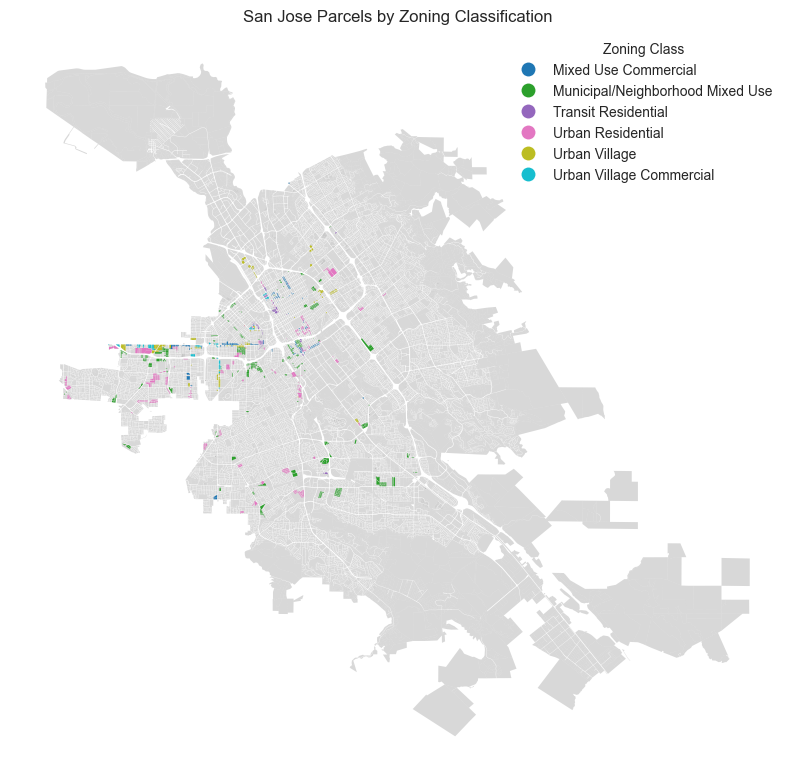

In [67]:
# -----------------------------------------------------
# Step 7: Simple map of parcels by zoning class
# -----------------------------------------------------
# Remove NA values before plotting
parcels_target_plot = parcels_target[parcels_target["zoning"] != "Other"]

# plot
fig, ax  = plt.subplots(figsize=(10,12))
ax.axis('off')
parcels.plot(ax=ax, color='grey', alpha=0.3, label='All Parcels')
parcels_target_plot.plot(ax=ax, column="zoning", legend=True, 
                          legend_kwds={'title': 'Zoning Class', 
                                      'loc': 'upper right'})
plt.title("San Jose Parcels by Zoning Classification")
plt.savefig("../output/maps/zoning_classes.pdf", format="pdf", bbox_inches="tight")
plt.show()